## Data Exploration

Importing data and storing it in a pandas dataframe.

In [4]:
import pandas as pd
# Load the dataset from an Excel file
data = pd.read_excel("E-Commerce data for regression.xlsx")


Identifying the numerical values, checking if there is any missing data in the dataset. 

In [2]:
data.describe()

,Order Date,Ship Date,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2015-07-02 08:37:12.575550720,2015-07-07 13:28:38.089296128,5.255040,156.431683,2.997309,0.029971,72.721836,7.272184
min,2015-01-01 00:00:00,2015-01-01 00:00:00,1.000000,33.000000,1.000000,0.010000,0.510000,0.051000
25%,2015-04-02 00:00:00,2015-04-07 00:00:00,3.000000,109.000000,2.000000,0.020000,25.730000,2.573000
50%,2015-07-03 00:00:00,2015-07-08 00:00:00,5.000000,159.000000,3.000000,0.030000,67.000000,6.700000
75%,2015-10-02 00:00:00,2015-10-07 00:00:00,8.000000,218.000000,4.000000,0.040000,120.560000,12.056000
max,2015-12-31 00:00:00,2016-01-10 00:00:00,10.000000,250.000000,5.000000,0.050000,167.500000,16.750000
std,NaN,NaN,2.959905,65.781374,1.413453,0.014114,49.099328,4.909933


In [5]:
data.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

Checking the variables that can have a predictive power over Sales.

In [27]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

<Axes: ylabel='Product Category'>

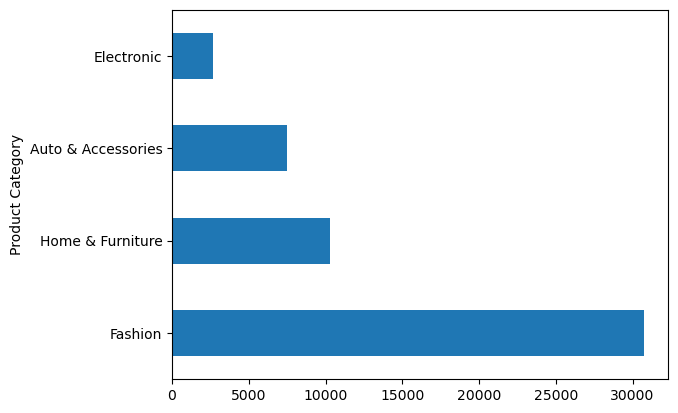

In [36]:
data['Product Category'].value_counts().plot(kind='barh')


Product Category Fashion conatins the highest number of products to be sold 

In [56]:
# Calculating sales monthwise
df1 = data.groupby(['Months'])['Sales'].sum().reset_index()
df1.head()

,Months,Sales
0,Apr,659404
1,Aug,670788
2,Dec,693073
3,Feb,610240
4,Jan,676313


In [61]:
df1.dtypes

Months    object
Sales      int64
dtype: object

In [63]:
#Assigning numeric value to the month
df1['month_no'] = df1['Months'].replace(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,
                    2,3,4,5,6,7,8,9,10,11,12])
df1.head()

,Months,Sales,month_no
0,Apr,659404,4
1,Aug,670788,8
2,Dec,693073,12
3,Feb,610240,2
4,Jan,676313,1


In [65]:
df2 = df1.sort_values("month_no").reset_index()
df2.head()

,index,Months,Sales,month_no
0,4,Jan,676313,1
1,3,Feb,610240,2
2,7,Mar,686681,3
3,0,Apr,659404,4
4,8,May,672547,5


In [68]:
df2=df2.drop('index',axis=1)


In [71]:
# Calculating sales growth rate
growth_rate = [0]
for i in range(len(df2['month_no'])):
    cal=((df2['Sales'][i+1]-df2['Sales'][i])/df2['Sales'][i])*100
    growth_rate.append(cal)
    i=i+1
    if i==11:
        break
growth_rate

[0,
 -9.769588932934898,
 12.526383062401678,
 -3.9722957239242094,
 1.9931635234241831,
 -1.1875749947587306,
 3.0985915492957745,
 -2.096469104665826,
 -1.7805923779197004,
 4.594714378517525,
 -4.709366782950911,
 5.544701011020874]

In [74]:
df2['Sales Growth Rate'] = growth_rate
df2.head()

,Months,Sales,month_no,Sales Growth Rate
0,Jan,676313,1,0.000000
1,Feb,610240,2,-9.769589
2,Mar,686681,3,12.526383
3,Apr,659404,4,-3.972296
4,May,672547,5,1.993164


In [77]:
df2['Sales Growth Rate'].mean()

0.3534721339588132

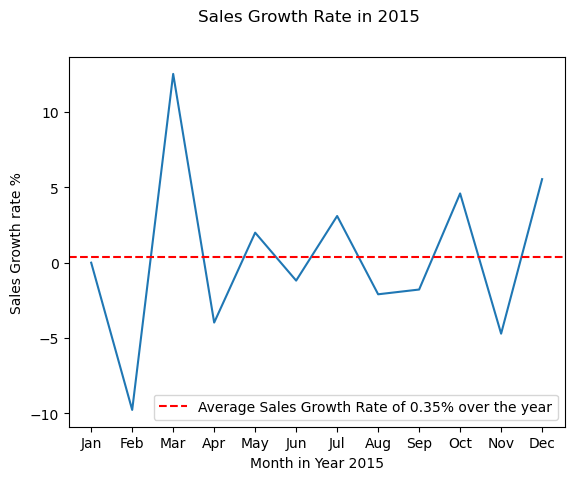

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(df2['Months'],df2['Sales Growth Rate'])
plt.suptitle("Sales Growth Rate in 2015")
plt.xlabel("Month in Year 2015")
plt.ylabel("Sales Growth rate %")
plt.axhline(y=0.35, color='r', linestyle='--', label='Average Sales Growth Rate of 0.35% over the year')
plt.legend()
plt.show()

## Feature Engineering

Our data has a lot of text columns. Hence, we will be creating dummy variables to see if any of these columns have an impact on sales.
we will check how sales interact with different region, product, segment etc., to facilitate our dummy variable creation.

/var/folders/3q/c64wmfcs4dx5qqyh5qbqn3c40000gn/T/ipykernel_22966/2457541012.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=avg_sales_by_region, estimator=sum, ci=None)


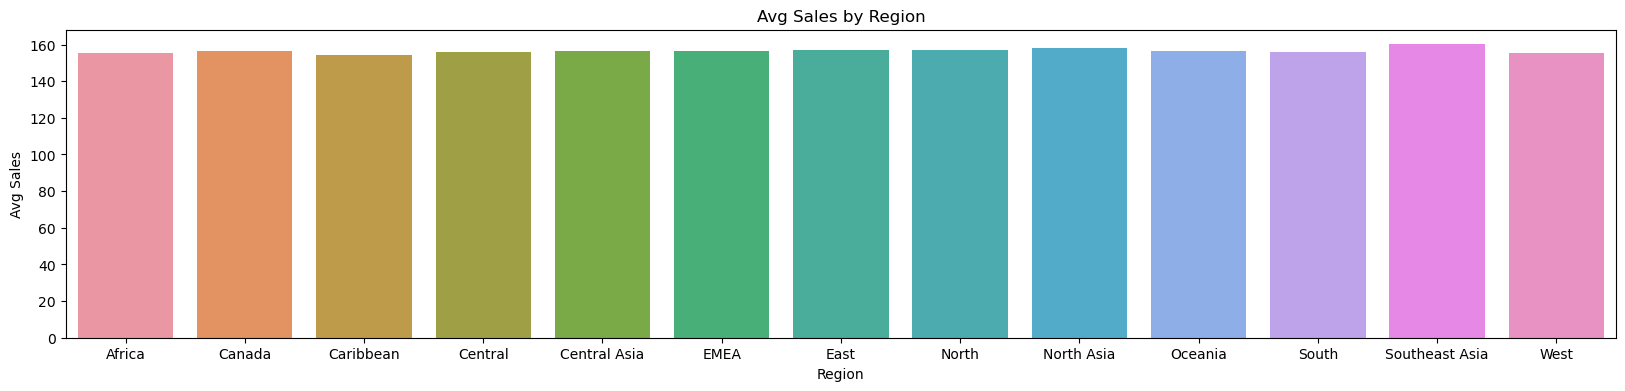

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_sales_by_region = data.groupby('Region')['Sales'].mean().reset_index()

plt.figure(figsize=(20, 4))
sns.barplot(x='Region', y='Sales', data=avg_sales_by_region, estimator=sum, ci=None)
plt.xlabel('Region')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Region')
plt.show()

Not much variance in sales based on each region

/var/folders/3q/c64wmfcs4dx5qqyh5qbqn3c40000gn/T/ipykernel_22966/2011408007.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Sales', data=avg_sales_by_category, estimator=sum, ci=None)


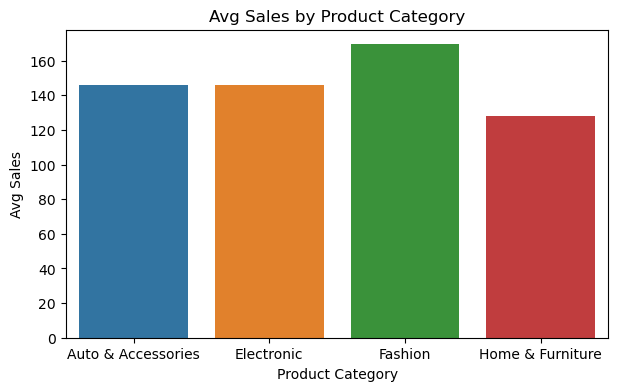

In [92]:
avg_sales_by_category = data.groupby('Product Category')['Sales'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(x='Product Category', y='Sales', data=avg_sales_by_category, estimator=sum, ci=None)
plt.xlabel('Product Category')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Product Category')
plt.show()


Fashion category products are likely to have more sales and Home & Furniture have less, will be creating dummy variables for product category to see how it interacts with sales in our model

/var/folders/3q/c64wmfcs4dx5qqyh5qbqn3c40000gn/T/ipykernel_22966/1915158109.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=avg_sales_by_segment, estimator=sum, ci=None)


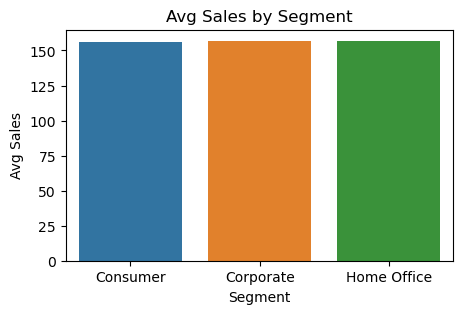

In [96]:
avg_sales_by_segment = data.groupby('Segment')['Sales'].mean().reset_index()


plt.figure(figsize=(5, 3))
sns.barplot(x='Segment', y='Sales', data=avg_sales_by_segment, estimator=sum, ci=None)
plt.xlabel('Segment')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Segment')
plt.show()


Not much variance in sales based on each segment

/var/folders/3q/c64wmfcs4dx5qqyh5qbqn3c40000gn/T/ipykernel_22966/194004084.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Months', y='Sales', data=avg_sales_by_month, estimator=sum, ci=None)


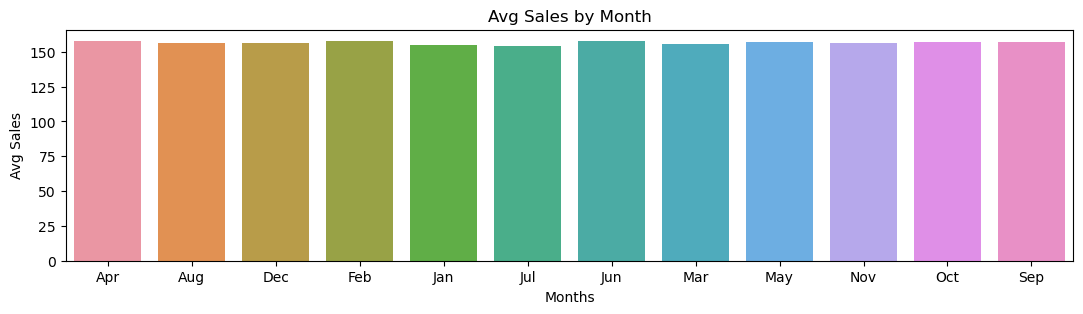

In [98]:
avg_sales_by_month = data.groupby('Months')['Sales'].mean().reset_index()


plt.figure(figsize=(13, 3))
sns.barplot(x='Months', y='Sales', data=avg_sales_by_month, estimator=sum, ci=None)
plt.xlabel('Months')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Month')
plt.show()


Not much variance in sales based on months

In [100]:
import statsmodels.api as sm
data.rename(columns={'Product Category': 'Product_Category', 'Shipping Cost': 'Shipping_Cost'}, inplace=True)

df_with_dummies = pd.get_dummies(data, columns=['Product_Category'], drop_first=True)
df_with_dummies.head(5)




,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,...,Customer Name,Segment,City,State,Country,Region,Months,Product_Category_Electronic,Product_Category_Fashion,Product_Category_Home & Furniture
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Car Media Players,140,2,0.05,46.00,...,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,False,False,False
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Car Speakers,211,3,0.03,112.01,...,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,False,False,False
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Car Body Covers,117,5,0.01,31.15,...,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,False,False,False
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Car & Bike Care,118,2,0.05,26.20,...,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,False,False,False
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Tyre,250,1,0.04,160.00,...,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,False,False,False


In [102]:
#Renaming columns
df_with_dummies.rename(columns={'Product_Category_Home & Furniture': 'Product_Category_Home_Furniture'}, inplace=True)


In [104]:
df_with_dummies.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode', 'Product',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost',
       'Order Priority', 'Customer ID', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Region', 'Months', 'Product_Category_Electronic',
       'Product_Category_Fashion', 'Product_Category_Home_Furniture'],
      dtype='object')

We are not going to include Profit and order priority in the model because we are might run into a correlation vs causation issue because
1) Profit is likely to increase because of the Sales and not the other way around.
2) Order priority is likely to be dependent on the value of the order.

In [131]:
features = ['Discount','Shipping_Cost','Aging','Product_Category_Fashion', 'Product_Category_Home_Furniture','Product_Category_Electronic']
# Prepare the features and target for OLS regression
X_ols = df_with_dummies[features]

X_ols = X_ols.astype(float)

# Prepare the features and target for OLS regression
X_ols = sm.add_constant(X_ols)  
y_ols = df_with_dummies['Sales']

# Fit the OLS regression model
ols_model = sm.OLS(y_ols, X_ols).fit()

# Print the model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 5.465e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:35:48   Log-Likelihood:            -2.3619e+05
No. Observations:               51290   AIC:                         4.724e+05
Df Residuals:                   51283   BIC:                         4.725e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

The F-statistic of this model is less than 0.05 so we reject the null and conclude that all the independent variables together are significant to the model.
The individual p-values of Aging, Product category_Electronic show that they are insignificant. Hence, removing them from our model

In [133]:
features1 = ['Discount','Shipping_Cost','Product_Category_Fashion', 'Product_Category_Home_Furniture']

# Prepare the features and target for OLS regression
X_ols1 = df_with_dummies[features1]

X_ols1 = X_ols1.astype(float)

# Prepare the features and target for OLS regression
X_ols1 = sm.add_constant(X_ols1)  
y_ols1 = df_with_dummies['Sales']

# Fit the OLS regression model
ols_model1 = sm.OLS(y_ols1, X_ols1).fit()

# Print the model summary
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 8.198e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:35:57   Log-Likelihood:            -2.3619e+05
No. Observations:               51290   AIC:                         4.724e+05
Df Residuals:                   51285   BIC:                         4.724e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Based on our final model, we conclude that Discount, Profit, 'Product Category_Fashion', 'Product Category_Home & Furniture' are significant to predict Sales with 86% accuracy. 

## Training the Model

In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt
from sklearn.linear_model import LinearRegression

'''
In order to input data from a pandas dataframe and into a sci-kit function,
we need to convert the dataframe series into NumPy Arrays. This can be done
with the values function.
'''
train_X = df_with_dummies[['Discount','Shipping_Cost','Product_Category_Fashion', 'Product_Category_Home_Furniture']].values
# 
train_y = df_with_dummies['Sales'].values

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_X,train_y,train_size=0.75,random_state=1)

reg = LinearRegression().fit(X_train, y_train)

print("R^2:",reg.score(X_train,y_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_train,reg.predict(X_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y_train,reg.predict(X_train)))

print("R^2:",reg.score(X_test,y_test))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_test,reg.predict(X_test))))
print("Mean Absolute Error:",mean_absolute_error(
    y_test,reg.predict(X_test))) 


R^2: 0.8650019770993284
Root Mean Squared Error: 24.187887400190917
Mean Absolute Error: 18.058144610163833
R^2: 0.8639091486638862
Root Mean Squared Error: 24.203453262981512
Mean Absolute Error: 18.072912338361196


R-Squared, Root Mean Squared Error and Mean Absolute Error are close for train and test data. No overfitting

## Linear Regression Assumptions

Checking if the linear regression assumptions are met by our model

**Heteroskedasticity**

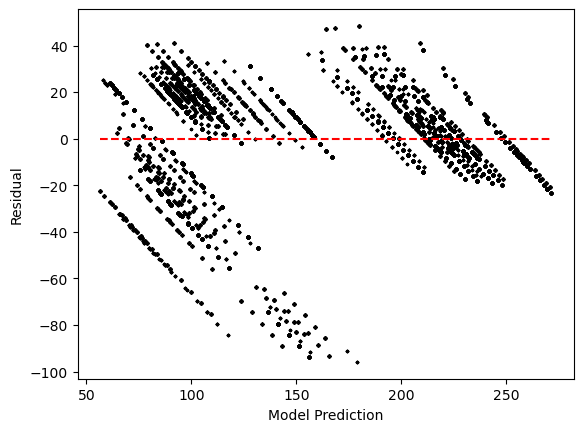

In [137]:

predicted_y = reg.predict(train_X)
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

There is a pattern here. Performing brush-pagan to confirm heteroskedasticity. Then, we will check induvidual variable plots to identify the pattern

In [139]:
#Additional check for heteroskedastiicity
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
results = ols('Sales ~ Discount + Shipping_Cost + Product_Category_Fashion + Product_Category_Home_Furniture',df_with_dummies).fit()
#Perform the Breuch-Pagan Test by running this line
bp = het_breuschpagan(results.resid,results.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 3641.7309690611546, 'LM-Test p-value': 0.0, 'F-Statistic': 979.9210787018873, 'F-Test p-value': 0.0}


We reject the null hypothesis and confirm heteroskedasticity

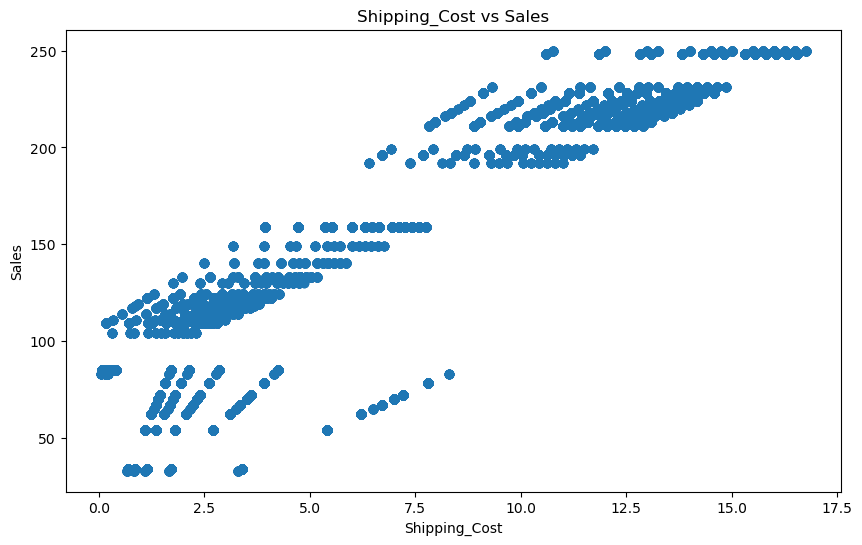

In [143]:

# Plot Shipping Cost vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df_with_dummies['Shipping_Cost'], df_with_dummies['Sales'])
plt.xlabel('Shipping_Cost')
plt.ylabel('Sales')
plt.title('Shipping_Cost vs Sales')
plt.show()

The sales values deviate from the equation when the sales are less

Checking for possible patterns in different products

/var/folders/3q/c64wmfcs4dx5qqyh5qbqn3c40000gn/T/ipykernel_22966/541073186.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Sales', data=avg_sales_by_product, estimator=sum, ci=None)


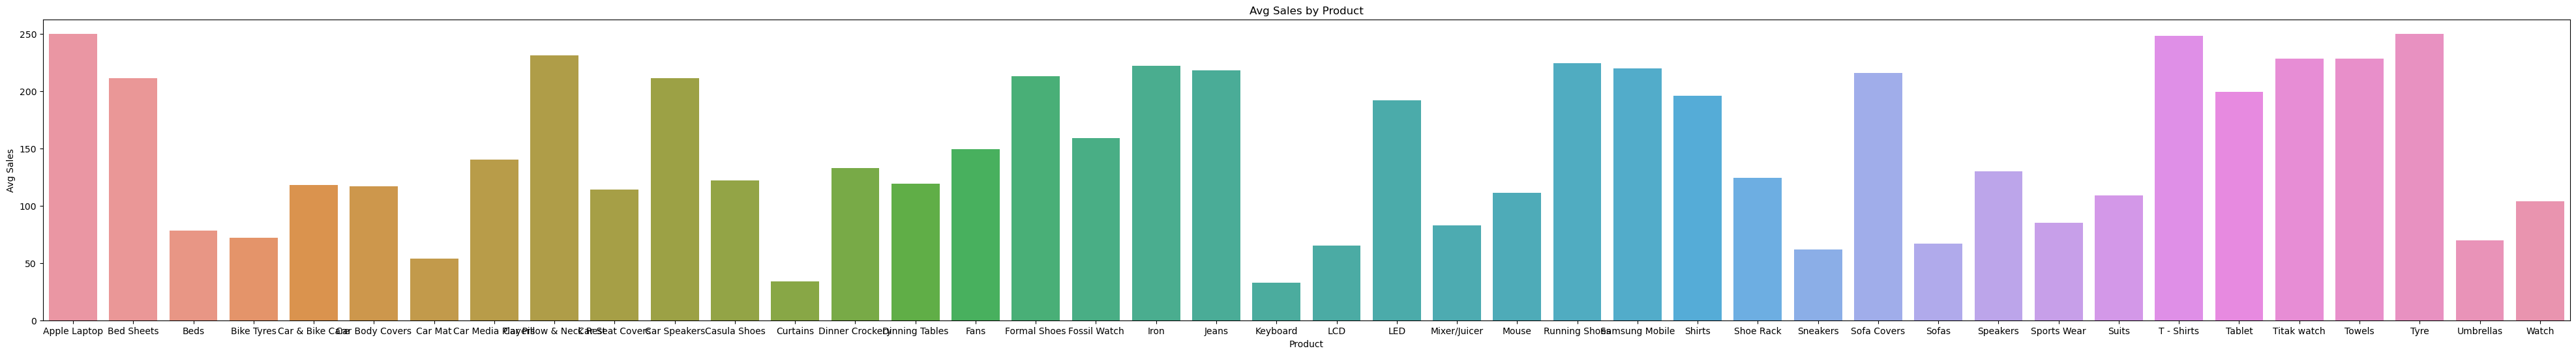

In [145]:
avg_sales_by_product = data.groupby('Product')['Sales'].mean().reset_index()

plt.figure(figsize=(50, 6))
sns.barplot(x='Product', y='Sales', data=avg_sales_by_product, estimator=sum, ci=None)
plt.xlabel('Product')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Product')
plt.show()


There is a high variablility in sales here

Creating two dummy variables to capture high sale products and low sale products

In [147]:
high_mean_sales_products = avg_sales_by_product[avg_sales_by_product['Sales'] > 200]
high_product_names = high_mean_sales_products['Product'].tolist()
print(high_product_names)
low_mean_sales_products = avg_sales_by_product[avg_sales_by_product['Sales'] < 100]
low_product_names = low_mean_sales_products['Product'].tolist()
print(low_product_names)
df_with_dummies['low_sale_products'] = df_with_dummies['Product'].apply(lambda x: 1 if x in low_product_names else 0)
df_with_dummies['high_sale_products'] = df_with_dummies['Product'].apply(lambda x: 1 if x in high_product_names else 0)
df_with_dummies.head()

['Apple Laptop', 'Bed Sheets', 'Car Pillow & Neck Rest', 'Car Speakers', 'Formal Shoes', 'Iron', 'Jeans', 'Running Shoes', 'Samsung Mobile', 'Sofa Covers', 'T - Shirts', 'Titak watch', 'Towels', 'Tyre']
['Beds', 'Bike Tyres', 'Car Mat', 'Curtains', 'Keyboard', 'LCD', 'Mixer/Juicer', 'Sneakers', 'Sofas', 'Sports Wear', 'Umbrellas']


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,...,City,State,Country,Region,Months,Product_Category_Electronic,Product_Category_Fashion,Product_Category_Home_Furniture,low_sale_products,high_sale_products
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Car Media Players,140,2,0.05,46.00,...,Brisbane,Queensland,Australia,Oceania,Nov,False,False,False,0,0
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Car Speakers,211,3,0.03,112.01,...,Berlin,Berlin,Germany,Central,Jun,False,False,False,0,1
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Car Body Covers,117,5,0.01,31.15,...,Porirua,Wellington,New Zealand,Oceania,Dec,False,False,False,0,0
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Car & Bike Care,118,2,0.05,26.20,...,Kabul,Kabul,Afghanistan,Central Asia,May,False,False,False,0,0
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Tyre,250,1,0.04,160.00,...,Townsville,Queensland,Australia,Oceania,Jul,False,False,False,0,1


In [149]:
features = ['Discount','low_sale_products','high_sale_products','Shipping_Cost','Product_Category_Fashion', 'Product_Category_Home_Furniture']

# Prepare the features and target for OLS regression
X_ols2 = df_with_dummies[features]

X_ols2 = X_ols2.astype(float)

# Prepare the features and target for OLS regression
X_ols2 = sm.add_constant(X_ols2)  
y_ols2 = df_with_dummies['Sales']

# Fit the OLS regression model
ols_model2 = sm.OLS(y_ols2, X_ols2).fit()

# Print the model summary
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.079e+05
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:37:12   Log-Likelihood:            -2.0462e+05
No. Observations:               51290   AIC:                         4.092e+05
Df Residuals:                   51283   BIC:                         4.093e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared increased and the dummy variables low_sale_products and high_sale_products are clearly significant

Checking residual patters to identify any patterns

Text(0, 0.5, 'Residuals')

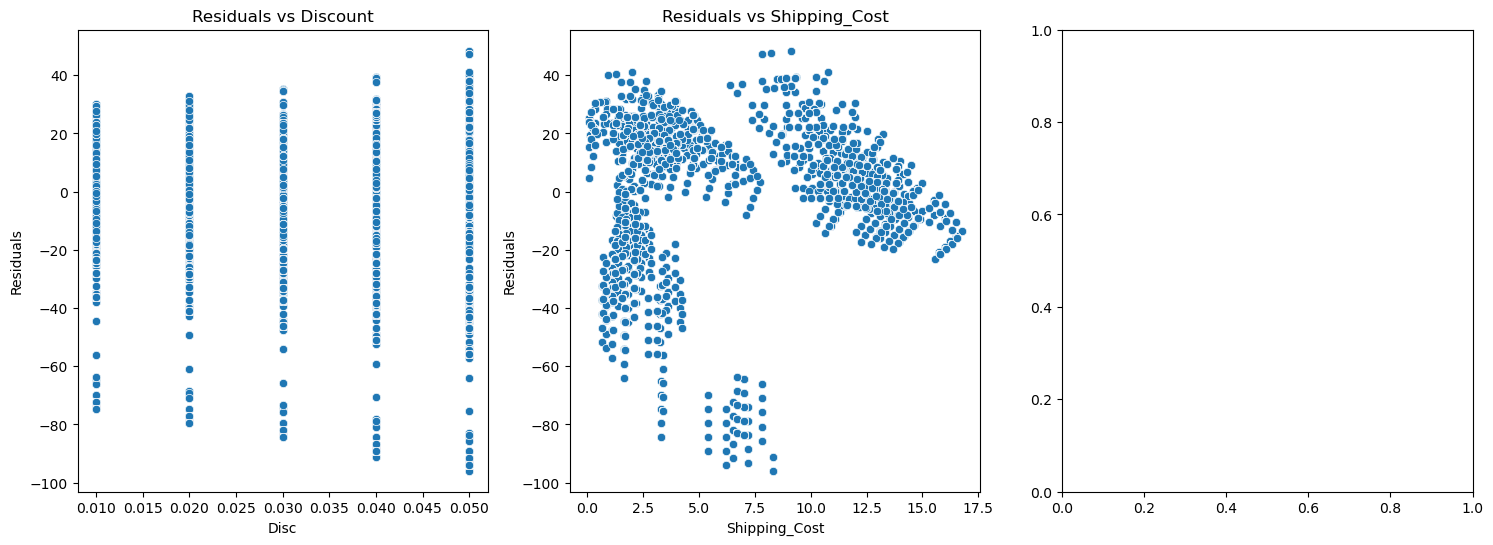

In [151]:
# Plot residuals against each independent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=df_with_dummies['Discount'], y=residuals, ax=axes[0])
axes[0].set_title('Residuals vs Discount')
axes[0].set_xlabel('Disc')
axes[0].set_ylabel('Residuals')

sns.scatterplot(x=df_with_dummies['Shipping_Cost'], y=residuals, ax=axes[1])
axes[1].set_title('Residuals vs Shipping_Cost')
axes[1].set_xlabel('Shipping_Cost')
axes[1].set_ylabel('Residuals')


There are outliers in this data. 

 **Residuals vs. Leverage(Influence plot)**

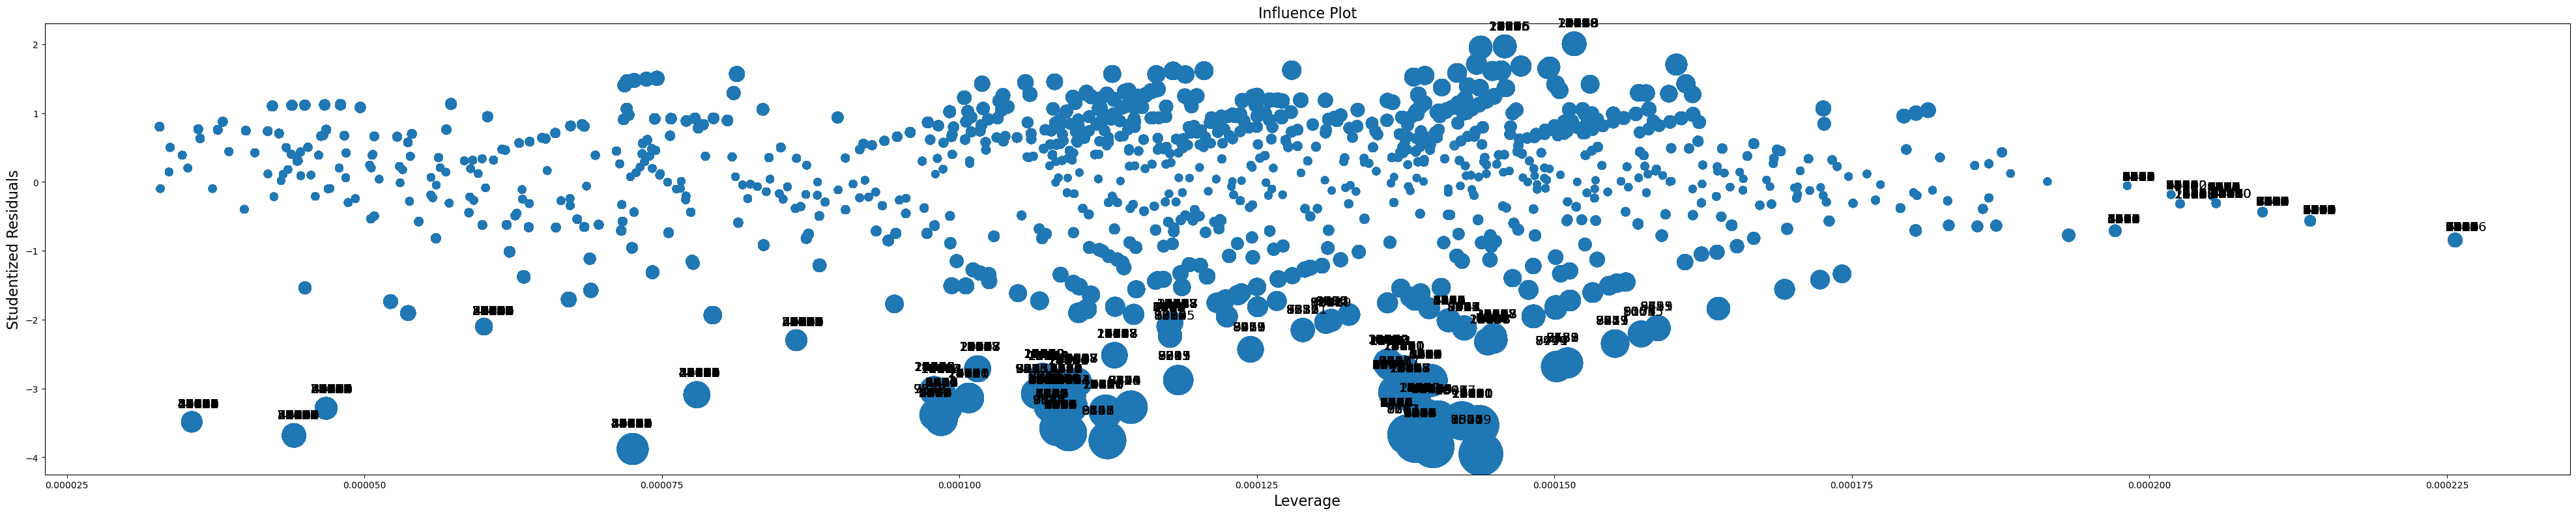

In [153]:
fig, ax = plt.subplots(figsize=(50,9))
fig = sm.graphics.influence_plot(ols_model1, ax=ax, criterion="cooks")
plt.show()


Getting the index of outliers to analyze further

In [156]:
influence = ols_model1.get_influence()
summary_frame = influence.summary_frame()
studentized_residuals = summary_frame['student_resid']

# Identify influential points based on Cook's distance
outliers = summary_frame[(abs(studentized_residuals) > 2)]
outlier_indices = outliers.index.tolist()
len(outlier_indices)


2347

The outliers here are less than 5% of whole data so removing them from our data set

In [159]:
data_cleaned = df_with_dummies.drop(outlier_indices)
data_cleaned.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product,Sales,Quantity,Discount,Profit,...,City,State,Country,Region,Months,Product_Category_Electronic,Product_Category_Fashion,Product_Category_Home_Furniture,low_sale_products,high_sale_products
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Car Media Players,140,2,0.05,46.00,...,Brisbane,Queensland,Australia,Oceania,Nov,False,False,False,0,0
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Car Speakers,211,3,0.03,112.01,...,Berlin,Berlin,Germany,Central,Jun,False,False,False,0,1
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Car Body Covers,117,5,0.01,31.15,...,Porirua,Wellington,New Zealand,Oceania,Dec,False,False,False,0,0
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Car & Bike Care,118,2,0.05,26.20,...,Kabul,Kabul,Afghanistan,Central Asia,May,False,False,False,0,0
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Tyre,250,1,0.04,160.00,...,Townsville,Queensland,Australia,Oceania,Jul,False,False,False,0,1


## Final Model

In [163]:
features = ['Discount','low_sale_products','high_sale_products','Shipping_Cost']

# Prepare the features and target for OLS regression
X_ols3 = data_cleaned[features]

X_ols3 = X_ols3.astype(float)

# Prepare the features and target for OLS regression
X_ols3 = sm.add_constant(X_ols3)  
y_ols3 = data_cleaned['Sales']

# Fit the OLS regression model
ols_model3 = sm.OLS(y_ols3, X_ols3).fit()

# Print the model summary
print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.807e+05
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:53:54   Log-Likelihood:            -1.8787e+05
No. Observations:               48943   AIC:                         3.758e+05
Df Residuals:                   48938   BIC:                         3.758e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 87.5569      0

R-squared increased and the dummy variables low_sale_products and high_sale_products are clearly significant. Removing 'Product_Category_Fashion', 'Product_Category_Home_Furniture' because the additional complexity in the model is not justified by the value these variables are providing.

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt
from sklearn.linear_model import LinearRegression

'''
In order to input data from a pandas dataframe and into a sci-kit function,
we need to convert the dataframe series into NumPy Arrays. This can be done
with the values function.
'''
train_X1 = data_cleaned[['Discount','low_sale_products','high_sale_products','Shipping_Cost']].values
# 
train_y1 = data_cleaned['Sales'].values

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_X1,train_y1,train_size=0.75,random_state=1)

reg1 = LinearRegression().fit(X_train, y_train)

print("R^2:",reg1.score(X_train,y_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_train,reg1.predict(X_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y_train,reg1.predict(X_train)))

print("R^2:",reg1.score(X_test,y_test))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_test,reg1.predict(X_test))))
print("Mean Absolute Error:",mean_absolute_error(
    y_test,reg1.predict(X_test))) 


R^2: 0.9685615985198666
Root Mean Squared Error: 11.28844899657567
Mean Absolute Error: 8.467871451086996
R^2: 0.9697598705342688
Root Mean Squared Error: 11.101120064434207
Mean Absolute Error: 8.333307422708348


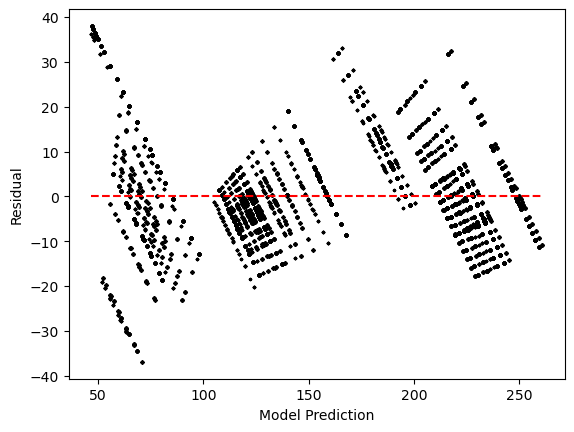

In [168]:
#Residuals calculated by definition above.
predicted_y = reg1.predict(train_X1)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y1 - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Looks much better

## Checking for other linear regression assumptions

**Density plot - Normality of errors**

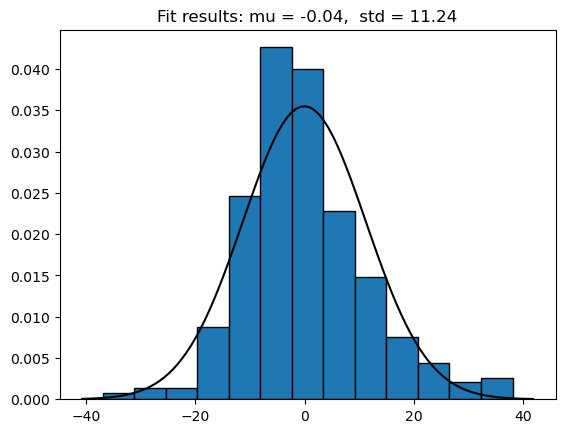

In [171]:
from scipy.stats import norm
import numpy as np

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

Looks good

**Multivariate normality(Q-Q plot)**.

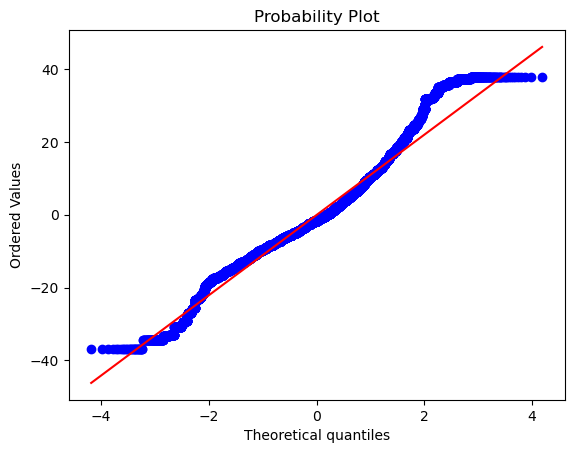

In [173]:
import scipy.stats as stats


fig = plt.figure()
ax = fig.add_subplot(111)


stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

Slightly deviated at the top but looks good

## Hypothesis tests

**Does the type of Product have an impact on the Sales?**

In [177]:
hypothesis = '(low_sale_products=0, high_sale_products=0)'
print(ols_model3.wald_test(hypothesis))

<F test: F=array([[42780.31393613]]), p=0.0, df_denom=4.89e+04, df_num=2>


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Since p-value < 0.05, we reject the null hypothesis and conclude that the type of Product does have an impact on Sales

In [179]:
data_for_test = data
data_for_test = pd.get_dummies(data, columns=['Months','Region','Segment'], drop_first=True)
data_for_test.head(5)


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product_Category,Product,Sales,Quantity,Discount,...,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,Segment_Corporate,Segment_Home Office
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,False,False,False,False,True,False,False,False,False,False
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,False,False,False,False,False,False,False,False,False,True
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,False,False,False,False,True,False,False,False,False,False
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,False,False,False,False,False,False,False,False,True,False
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,False,False,False,False,True,False,False,False,True,False


In [181]:
#Renaming columns
data_for_test.rename(columns={'Region_Central Asia': 'Region_Central_Asia','Region_North Asia':'Region_North_Asia','Region_Southeast Asia':'Region_Southeast_Asia','Segment_Home Office':'Segment_Home_Office'}, inplace=True)
data_for_test.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product_Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'City', 'State', 'Country', 'Months_Aug', 'Months_Dec',
       'Months_Feb', 'Months_Jan', 'Months_Jul', 'Months_Jun', 'Months_Mar',
       'Months_May', 'Months_Nov', 'Months_Oct', 'Months_Sep', 'Region_Canada',
       'Region_Caribbean', 'Region_Central', 'Region_Central_Asia',
       'Region_EMEA', 'Region_East', 'Region_North', 'Region_North_Asia',
       'Region_Oceania', 'Region_South', 'Region_Southeast_Asia',
       'Region_West', 'Segment_Corporate', 'Segment_Home_Office'],
      dtype='object')

In [183]:
import statsmodels.api as sm
features4 = ['Months_Aug',
       'Months_Dec', 'Months_Feb', 'Months_Jan', 'Months_Jul', 'Months_Jun',
       'Months_Mar', 'Months_May', 'Months_Nov', 'Months_Oct', 'Months_Sep',
       'Region_Canada', 'Region_Caribbean', 'Region_Central',
       'Region_Central_Asia', 'Region_EMEA', 'Region_East', 'Region_North',
       'Region_North_Asia', 'Region_Oceania', 'Region_South',
       'Region_Southeast_Asia', 'Region_West','Segment_Corporate', 'Segment_Home_Office']

# Prepare the features and target for OLS regression
X_ols4 = data_for_test[features4]

X_ols4 = X_ols4.astype(float)

# Prepare the features and target for OLS regression
X_ols4 = sm.add_constant(X_ols4)  
y_ols4 = data_for_test['Sales']

# Fit the OLS regression model
ols_model4 = sm.OLS(y_ols4, X_ols4).fit()

# Print the model summary
print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.378
Date:                Sun, 04 Aug 2024   Prob (F-statistic):             0.0985
Time:                        16:56:02   Log-Likelihood:            -2.8748e+05
No. Observations:               51290   AIC:                         5.750e+05
Df Residuals:                   51264   BIC:                         5.752e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   156.46

**Does Month have an impact on the Sales?**

In [185]:
hypothesis1 = '(Months_Aug=0, Months_Dec=0, Months_Feb=0, Months_Jan=0, Months_Jul=0, Months_Jun=0, Months_Mar=0, Months_May=0, Months_Nov=0, Months_Oct=0, Months_Sep=0)'
print(ols_model4.wald_test(hypothesis1))

<F test: F=array([[1.33317453]]), p=0.1983962647198173, df_denom=5.13e+04, df_num=11>


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Since p-value > 0.05, we accept the null hypothesis and conclude that the Month does not have an impact on Sales

**Does Region have an impact on the Sales?**

In [187]:
hypothesis2 = '( Region_Canada=0, Region_Caribbean=0, Region_Central=0,Region_Central_Asia=0, Region_EMEA=0, Region_East=0, Region_North=0,Region_North_Asia=0, Region_Oceania=0, Region_South=0,Region_Southeast_Asia=0, Region_West=0)'
print(ols_model4.wald_test(hypothesis2))

<F test: F=array([[1.41023206]]), p=0.15256871679877038, df_denom=5.13e+04, df_num=12>


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Since p-value > 0.05, we accept the null hypothesis and conclude that the Region does not have an impact on Sales

**Does Segment have an impact on sales?**

In [189]:
hypothesis3 = '( Segment_Corporate=0, Segment_Home_Office)'
print(ols_model4.wald_test(hypothesis3))

<F test: F=array([[1.53842149]]), p=0.21472968495594383, df_denom=5.13e+04, df_num=2>


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Since p-value > 0.05, we accept the null hypothesis and conclude that Segment does not have an impact on Sales